Examples of analysing of the same dataset:
- https://blog.devgenius.io/red-wine-quality-prediction-using-classification-and-regression-model-f19337821b71
- https://towardsdatascience.com/red-wine-quality-prediction-using-regression-modeling-and-machine-learning-7a3e2c3e1f46

In [1]:
import pandas as pd

### Data loading and preparing

In [2]:
wine_red = pd.read_csv('./data/winequality-red.csv', delimiter=';')
wine_white = pd.read_csv('./data/winequality-white.csv', delimiter=';')

Stack two dataframes on top of each other, getting the result one for analysis.

Here is more information about combining of data frames: https://datacarpentry.org/python-ecology-lesson/05-merging-data/

In [3]:
data = pd.concat([wine_red, wine_white], axis=0)

Verify data has no issues and prepare if needed

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


**Results:**
- there is no nulls
- all data is expected

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**Results:**
- distribution for all data fields is close to standard
- stddev is not too high which means data is quite eqally distributed (only 'free sulfur dioxide' and 'total sulfur dioxide' have higher sddev value)

It's possible to check other charachteristics of the dataset, but this looks fine and we can try to predict.


Another hints about data analysis:
- [another data analysis example](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
- [usefull methods of pandas datafram](https://medium.com/analytics-vidhya/top-20-pandas-functions-which-are-commonly-used-for-exploratory-data-analysis-3cb817a60f46)

## Trying to predict

### Feature Analysis

The value of the field **quality** is what we need to predict.

Before trying to predict it, we need to find which fields could be used as features (and/or add additional). Such fields have high correlation with the value (positive or negative).

Other readings about data analysis with Pandas:
- [examples of data analysis with Pandas](https://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/)
- [more focus on data analysis with plots](https://towardsdatascience.com/exploratory-data-analysis-with-pandas-508a5e8a5964)
- [about scatter plot matrix](https://dzone.com/articles/what-when-amp-how-of-scatterplot-matrix-in-python)
- [automated feature selection](https://www.kaggle.com/willkoehrsen/automated-feature-engineering-tutorial) (we won't do it now)
- [feature selectin with sklearn](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)


In [6]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


**Results:**
- fields with high correlation: alcohol (0.444319), density (-0.305858), chlorides (-0.200666), volatile acidity (-0.265699)


array([[<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='chlorides', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='density', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='pH', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='alcohol', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='quality', ylabel='fixed acidity'>],
       [<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='cit

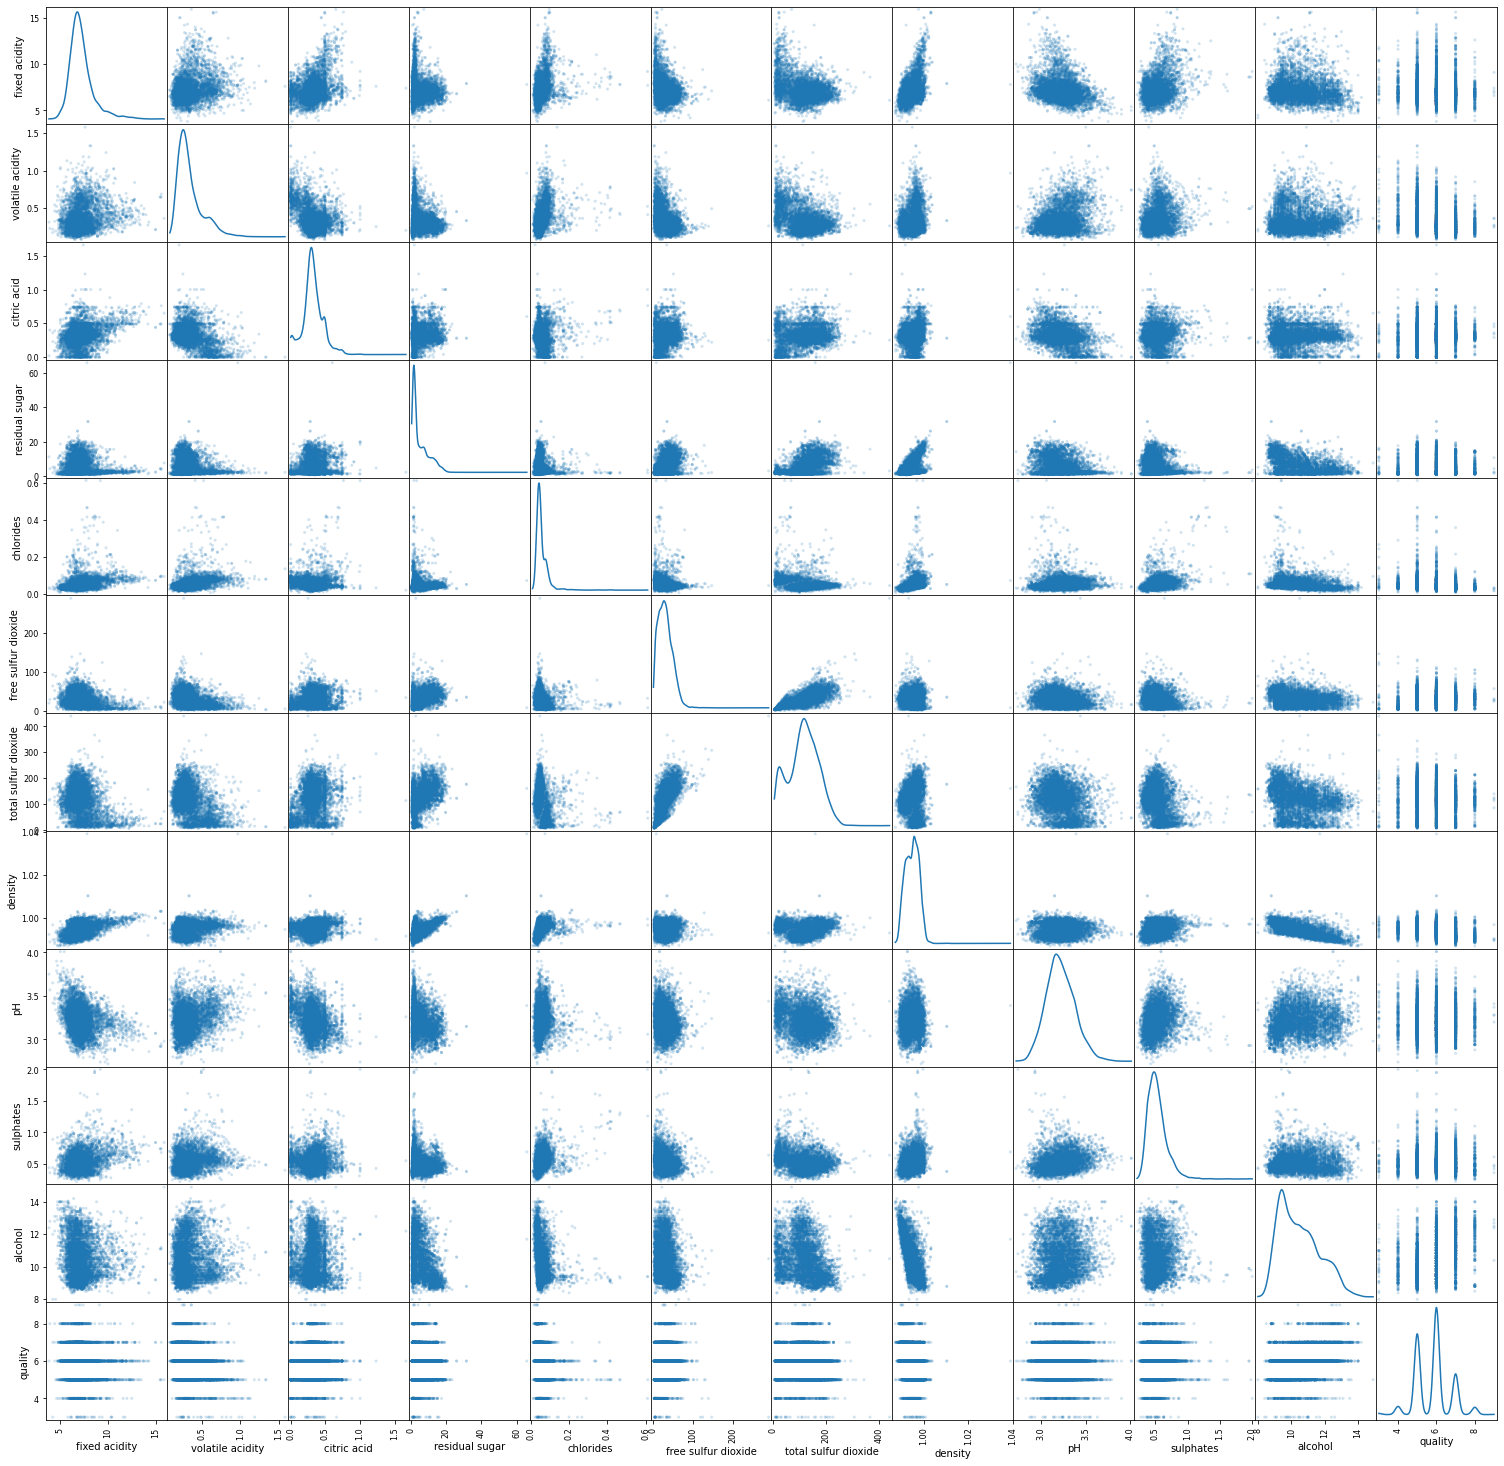

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(26, 26), diagonal='kde')

**Results:**
- possible correlations:
    - density, fixed acidity
    - density, residual sugar
    - sulphates, fixed acidity
    - pH, fixed acidity
    - total sulfur dioxide, free sulfur dioxide
    - volatile acidity, pH

We need to review how they correlate with quality.

In [8]:
data[['fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'quality']].corr()

,fixed acidity,volatile acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
fixed acidity,1.000000,0.219008,-0.111981,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.076743
volatile acidity,0.219008,1.000000,-0.196011,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.265699
residual sugar,-0.111981,-0.196011,1.000000,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.036980
free sulfur dioxide,-0.282735,-0.352557,0.402871,1.000000,0.720934,0.025717,-0.145854,-0.188457,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.495482,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.041385
density,0.458910,0.271296,0.552517,0.025717,0.032395,1.000000,0.011686,0.259478,-0.305858
pH,-0.252700,0.261454,-0.267320,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.019506
sulphates,0.299568,0.225984,-0.185927,-0.188457,-0.275727,0.259478,0.192123,1.000000,0.038485
quality,-0.076743,-0.265699,-0.036980,0.055463,-0.041385,-0.305858,0.019506,0.038485,1.000000


### Choosing ML algorithms to experiment with

Choosing an algorithm for ML model:
- [different types of algorithms](https://towardsdatascience.com/do-you-know-how-to-choose-the-right-machine-learning-algorithm-among-7-different-types-295d0b0c7f60)
- [more about choosing the algorithm](https://www.kdnuggets.com/2020/05/guide-choose-right-machine-learning-algorithm.html)
- [and even more](https://blogs.sas.com/content/subconsciousmusings/2020/12/09/machine-learning-algorithm-use/)

Observations about our case:
- multiclass classification: the field quantity has more than 2 categories
- imbalanced dataset: data in the field "quality" is not equally distributed

Examples:
- [Example 1](https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a)
- [Example 2](https://towardsdatascience.com/decision-tree-algorithm-for-multiclass-problems-using-python-6b0ec1183bf5)